In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy import stats

In [4]:
ev_df = pd.read_csv("data/ev_sales/ev_data_preprocessed.csv")
asthma_df = pd.read_csv("odds_ratio_module/data/PR_IR_AF_2010_2020.csv")
df = ev_df.merge(asthma_df, how='left', on=['state_code', 'year'])

In [5]:
df

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,total,nonev_sales,population,PR,at_risk,incidence_cases,AC,IR,SAF,incidences_trap
0,Alabama,0,NaN,18,NaN,55,NaN,2011,Alabama,1,...,NaN,NaN,1123827,0.087753,1.025208e+06,8529.810778,0.000000,0.00832,0.000000,0.000000
1,Alaska,0,NaN,2,NaN,4,NaN,2011,Alaska,2,...,NaN,NaN,188580,0.087753,1.720316e+05,1431.316134,0.000000,0.00832,0.000000,0.000000
2,Arizona,0,NaN,355,NaN,102,NaN,2011,Arizona,4,...,NaN,NaN,1615952,0.084094,1.480060e+06,12314.216084,4534.332967,0.00832,0.368219,4534.332967
3,Arkansas,0,NaN,2,NaN,20,NaN,2011,Arkansas,5,...,NaN,NaN,711633,0.087753,6.491851e+05,5401.271577,258.704714,0.00832,0.047897,258.704714
4,California,19,NaN,5062,NaN,1656,NaN,2011,California,6,...,NaN,NaN,9244611,0.087753,8.433370e+06,70166.300100,29102.390049,0.00832,0.414763,29102.390049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Virginia,0,0.0,5677,0.0153,1337,0.0036,2019,Virginia,51,...,371389.0,364375.0,1860848,0.073197,1.724639e+06,10675.526046,1405.592680,0.00619,0.131665,1405.592680
455,Washington,0,0.0,10256,0.0359,1916,0.0067,2019,Washington,53,...,285971.0,273799.0,1663061,0.073197,1.541329e+06,9540.838920,1531.589825,0.00619,0.160530,1531.589825
456,West Virginia,0,0.0,179,0.0035,71,0.0014,2019,West Virginia,54,...,51143.0,50893.0,359567,0.073197,3.332476e+05,2062.805169,0.000000,0.00619,0.000000,0.000000
457,Wisconsin,0,0.0,1381,0.0057,581,0.0024,2019,Wisconsin,55,...,242281.0,240319.0,1266597,0.041074,1.214573e+06,7518.217138,461.941239,0.00619,0.061443,461.941239


In [9]:
df['pre_trap'] = df['population']*df['PR']*df['SAF']
df['ev_market_share'] = df['ev_sales']/df['total']
df['nonev_market_share'] = df['nonev_sales']/df['total']

df['ev_sales_log'] = np.log(df['ev_sales'])
df['nonev_sales_log'] = np.log(df['nonev_sales'])

In [10]:
def calco(df):
    return df[['ev_sales', 'nonev_sales', 'SAF', 'incidences_trap', 'pre_trap', 'ev_market_share', 'nonev_market_share', 
               'ev_sales_log', 'nonev_sales_log']].corr()

In [11]:
calco(df)

,ev_sales,nonev_sales,SAF,incidences_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.608663,0.294350,0.690394,0.668994,0.708077,-0.708077,0.468249,0.376865
nonev_sales,0.608663,1.000000,0.262128,0.788258,0.803529,0.300510,-0.300510,0.682963,0.842581
SAF,0.294350,0.262128,1.000000,0.468800,0.480020,0.405070,-0.405070,0.326272,0.164340
incidences_trap,0.690394,0.788258,0.468800,1.000000,0.951529,0.485371,-0.485371,0.504616,0.550828
pre_trap,0.668994,0.803529,0.480020,0.951529,1.000000,0.471735,-0.471735,0.517652,0.568180
ev_market_share,0.708077,0.300510,0.405070,0.485371,0.471735,1.000000,-1.000000,0.635143,0.172106
nonev_market_share,-0.708077,-0.300510,-0.405070,-0.485371,-0.471735,-1.000000,1.000000,-0.635143,-0.172106
ev_sales_log,0.468249,0.682963,0.326272,0.504616,0.517652,0.635143,-0.635143,1.000000,0.769615
nonev_sales_log,0.376865,0.842581,0.164340,0.550828,0.568180,0.172106,-0.172106,0.769615,1.000000


In [8]:
tdf = df[df['ZEV Mandates'] == 1]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.806656,0.453869,0.436639,0.675835,0.652886,0.867855,-0.867855,0.648650,0.569814
nonev_sales,0.806656,1.000000,0.434064,0.584184,0.916592,0.914189,0.591081,-0.591081,0.857623,0.871265
OR,0.453869,0.434064,1.000000,0.736292,0.580899,0.511189,0.290839,-0.290839,0.421421,0.433179
AF,0.436639,0.584184,0.736292,1.000000,0.664115,0.702963,0.245704,-0.245704,0.321596,0.521633
incidence_trap,0.675835,0.916592,0.580899,0.664115,1.000000,0.947551,0.601221,-0.601221,0.631340,0.710814
pre_trap,0.652886,0.914189,0.511189,0.702963,0.947551,1.000000,0.571100,-0.571100,0.627056,0.716637
ev_market_share,0.867855,0.591081,0.290839,0.245704,0.601221,0.571100,1.000000,-1.000000,0.732461,0.397618
nonev_market_share,-0.867855,-0.591081,-0.290839,-0.245704,-0.601221,-0.571100,-1.000000,1.000000,-0.732461,-0.397618
ev_sales_log,0.648650,0.857623,0.421421,0.321596,0.631340,0.627056,0.732461,-0.732461,1.000000,0.881123
nonev_sales_log,0.569814,0.871265,0.433179,0.521633,0.710814,0.716637,0.397618,-0.397618,0.881123,1.000000


In [9]:
tdf = df[df['ZEV Mandates'] == 0]
calco(tdf)

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.587259,0.137851,0.057199,0.380336,0.374752,0.575233,-0.575233,0.736022,0.571349
nonev_sales,0.587259,1.000000,0.087098,0.092330,0.781693,0.805971,-0.031866,0.031866,0.605599,0.848367
OR,0.137851,0.087098,1.000000,0.914503,0.435599,0.332714,0.318341,-0.318341,0.195476,0.068529
AF,0.057199,0.092330,0.914503,1.000000,0.436991,0.410901,0.251484,-0.251484,0.130811,0.086525
incidence_trap,0.380336,0.781693,0.435599,0.436991,1.000000,0.936534,-0.015802,0.015802,0.468313,0.689474
pre_trap,0.374752,0.805971,0.332714,0.410901,0.936534,1.000000,0.009035,-0.009035,0.471295,0.700565
ev_market_share,0.575233,-0.031866,0.318341,0.251484,-0.015802,0.009035,1.000000,-1.000000,0.548610,0.002870
nonev_market_share,-0.575233,0.031866,-0.318341,-0.251484,0.015802,-0.009035,-1.000000,1.000000,-0.548610,-0.002870
ev_sales_log,0.736022,0.605599,0.195476,0.130811,0.468313,0.471295,0.548610,-0.548610,1.000000,0.749596
nonev_sales_log,0.571349,0.848367,0.068529,0.086525,0.689474,0.700565,0.002870,-0.002870,0.749596,1.000000


In [10]:
calco(df[df['state_code'] != 6])

,ev_sales,nonev_sales,OR,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.595615,0.140589,0.042909,0.345957,0.338672,0.562108,-0.562108,0.740967,0.584414
nonev_sales,0.595615,1.000000,0.094127,0.104696,0.779807,0.806808,-0.045257,0.045257,0.605284,0.857526
OR,0.140589,0.094127,1.000000,0.878995,0.444577,0.339806,0.255445,-0.255445,0.219526,0.106056
AF,0.042909,0.104696,0.878995,1.000000,0.444553,0.433595,0.178731,-0.178731,0.132261,0.115981
incidence_trap,0.345957,0.779807,0.444577,0.444553,1.000000,0.940962,-0.057751,0.057751,0.452187,0.705164
pre_trap,0.338672,0.806808,0.339806,0.433595,0.940962,1.000000,-0.036061,0.036061,0.448539,0.715165
ev_market_share,0.562108,-0.045257,0.255445,0.178731,-0.057751,-0.036061,1.000000,-1.000000,0.563510,-0.000322
nonev_market_share,-0.562108,0.045257,-0.255445,-0.178731,0.057751,0.036061,-1.000000,1.000000,-0.563510,0.000322
ev_sales_log,0.740967,0.605284,0.219526,0.132261,0.452187,0.448539,0.563510,-0.563510,1.000000,0.743145
nonev_sales_log,0.584414,0.857526,0.106056,0.115981,0.705164,0.715165,-0.000322,0.000322,0.743145,1.000000


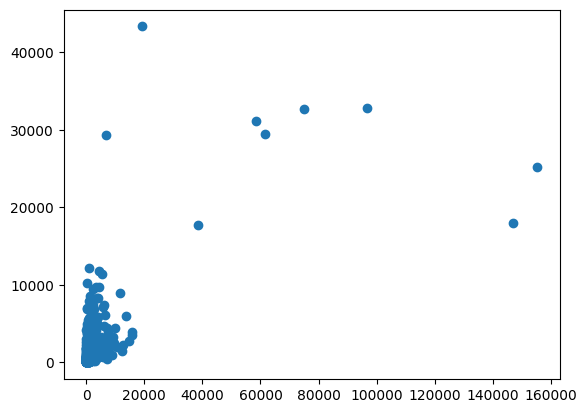

In [11]:
x, y = df['ev_sales'], df['incidence_trap']

plt.scatter(x, y)

[[1.        0.4555941]
 [0.4555941 1.       ]]


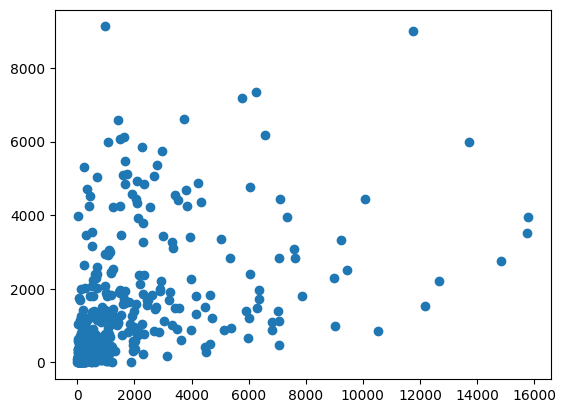

In [13]:
# remove outliers

def remove_out(df, cols):
    for col in cols:
        df = df[(np.abs(stats.zscore(df[col])) < 3)]
    return df
        
tdf = remove_out(df, ['ev_sales', 'incidences_trap'])
x, y = tdf['ev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.41662762]
 [0.41662762 1.        ]]


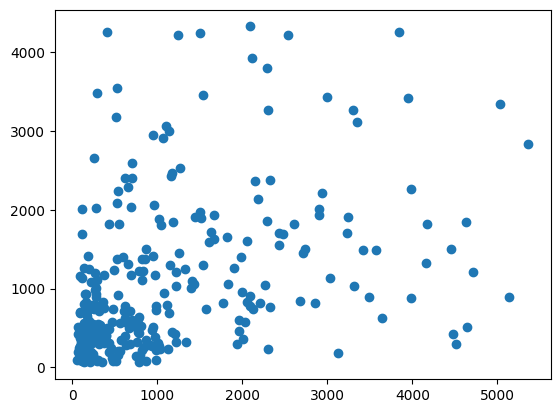

In [14]:
# ev_sales and incidence_trap

min_trap, max_trap = np.percentile(df['incidences_trap'], 10), np.percentile(df['incidences_trap'], 90)
min_ev, max_ev = np.percentile(df['ev_sales'], 10), np.percentile(df['ev_sales'], 90)

filtr = (df['ev_sales'] < max_ev) & (df['ev_sales'] > min_ev) & (df['incidences_trap'] < max_trap) & (df['incidences_trap'] > min_trap)
tdf = df[filtr]
x, y = tdf['ev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.        0.5851984]
 [0.5851984 1.       ]]


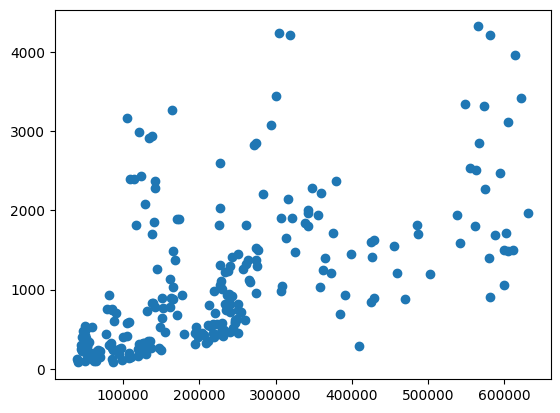

In [15]:
# non ev sales

tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidences_trap'], 10), np.percentile(tdf['incidences_trap'], 90)
min_ev, max_ev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)

filtr = (tdf['nonev_sales'] < max_ev) & (tdf['nonev_sales'] > min_ev) & (tdf['incidences_trap'] < max_trap) & (tdf['incidences_trap'] > min_trap)
tdf = tdf[filtr]
x, y = tdf['nonev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

In [19]:
tdf = tdf[tdf['year']>2013]
x, y = tdf['nonev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))

[[1.         0.60406942]
 [0.60406942 1.        ]]


In [20]:
replace_year = {i:j for i, j in zip(range(2011, 2020), range(1, 12))}
df['year_fixed'] = df['year'].replace(replace_year)

In [21]:
df = df.rename(columns={'ZEV Mandates': 'ZEV_Mandates', 'EPA Region': 'EPA_Region'})

In [22]:
df.to_csv("output_files/for_R_ambient_model.csv", index=False)

In [25]:
tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidences_trap'], 10), np.percentile(tdf['incidences_trap'], 90)
min_nonev, max_nonev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)
min_ev, max_ev = np.percentile(tdf['ev_sales'], 10), np.percentile(tdf['ev_sales'], 90)


filtr = (tdf['ev_sales'] < max_ev) & (tdf['ev_sales'] > min_ev) & (tdf['nonev_sales'] < max_nonev) & (tdf['nonev_sales'] > min_nonev) & (tdf['incidences_trap'] < max_trap) & (tdf['incidences_trap'] > min_trap)
tdf = tdf[filtr]
tdf.to_csv("output_files/for_R_ambient_model_filter.csv", index=False)

In [26]:
def get_IQR(df, col):
    return np.percentile(tdf[col], 75) - np.percentile(tdf[col], 25)

-8.904e-02 * get_IQR(tdf, 'ev_sales'),  5.163572e-03* get_IQR(tdf, 'nonev_sales')

(-148.87488, 844.006497688)

In [21]:
 -0.01397* get_IQR(tdf, 'ev_sales')

-23.97252

In [21]:
get_IQR(tdf, 'ev_sales')

1716.0

In [23]:
get_IQR(tdf, 'nonev_sales')

154202.0

In [25]:
154202.0/796.2

193.6724441095202